# Tensorflow Workshop (2019/6/30)

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## python tutorial

參考：https://www.w3schools.com/python/python_lists.asp

* print: 
    * `print('Hello!')`
    * `print('Art: %5d, Price: %8.2f' % (453, 59.058))`
    * `print('Art: {0:5d}, Price: {1:8.2f}'.format(453, 59.058))`
    * 參考：https://www.python-course.eu/python3_formatted_output.php
* list
* tuples
* dictionaries
* if ... elif ... else
* while loop
* for loop
* function
* class


### Mission

假設今天有一燈泡組，第一顆燈泡會接上電源，然後第一顆燈泡（序號為0）接上第二顆燈泡（序號為1），第二顆燈泡（序號為1）接上第三顆燈泡（序號為2），依序連接，總共有5顆燈泡。另外，每顆燈泡都有一個開關，開關打開代表導通，燈泡就有機會亮，但還需要兩個額外條件：第一，這顆燈泡已接上電源，第二，前一顆燈泡亮了（已導通），所以如果依照順序 `[2, 0, 3, 1, 4]` 的開啟燈泡，則燈泡組會有 `3` 階段的亮法，如下所示：

```
switch on: 2
bulbs: _ _ _ _ _
switch on: 0
bulbs: * _ _ _ _
switch on: 3
bulbs: * _ _ _ _
switch on: 1
bulbs: * * * * _
switch on: 4
bulbs: * * * * *
```

請大家幫我利用以下的code把這個demo實作出來。

In [7]:
class Bulb:
    def __init__(self, name):
        self.name = name

        self._connect_source = False
        self._switch_on = False
        self._prev = None
        self._next = None
    
    def append(self, next_bulb):
        self._next = next_bulb
        next_bulb._prev = self
    
    def connect_source(self):
        self._connect_source = True

    def switch_on(self):
        self._switch_on = True
    
    def is_light(self):
        # 幫我在這邊實作出兩種情形要回傳True（亮）
        # 第一種情況是，燈泡有接電源且開關打開
        # 第二種情況是，前面接的燈泡有亮且開關打開
        # hint: 記得檢查上一個燈泡是否存在
        # answer here
        if self._switch_on :
            if self._connect_source:
                return True
            elif self._prev and self._prev.is_light():
                return True
        return False
        

    
def demo(order):
    N = 5
    bulbs = [Bulb(i) for i in range(N)]

    # 幫我在這邊讓第一顆燈泡接上電源，並且串接各個燈泡成為燈泡組
    # answer here
    bulbs[0].connect_source()
    for i in range(0, N-1):
      bulbs[i].append(bulbs[i+1])
      
    for j in order:
        print('switch on: {0}'.format(j))
        bulbs[j].switch_on()
        light_status = ['*' if bulbs[i].is_light() else '_' for i in range(N)]
        print('bulbs: {0}'.format(' '.join(light_status)))


demo([2, 0, 3, 1, 4])

### Correct Output
# switch on: 2
# bulbs: _ _ _ _ _
# switch on: 0
# bulbs: * _ _ _ _
# switch on: 3
# bulbs: * _ _ _ _
# switch on: 1
# bulbs: * * * * _
# switch on: 4

switch on: 2
bulbs: _ _ _ _ _
switch on: 0
bulbs: * _ _ _ _
switch on: 3
bulbs: * _ _ _ _
switch on: 1
bulbs: * * * * _
switch on: 4
bulbs: * * * * *


## Numpy tutorial

參考：
https://www.ycc.idv.tw/python-play-with-data_2.html  
https://www.ycc.idv.tw/python-play-with-data_3.html


### ndarray
Numpy最重要的元素就是ndarray，它是N-Dimensional Array的縮寫，在Numpy裡，dimesions被稱為axes，而axes的數量被稱為rank，axes是一個重要的概念，了解這個概念基本上就把Numpy搞懂一半以上了。

先來建立一個簡單的ndarray

In [6]:
A = np.array(
    [
        [
            [1,2,3], [4,5,6]
        ],
        [
            [7,8,9], [10,11,12]
        ],
    ]
)
A

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [7]:
A.shape

(2, 2, 3)

下面這張圖可以幫助大家理解
![](http://www.ycc.idv.tw/media/PlayDataWithPython/ndarray_axis.png)

In [8]:
np.sum(A, axis=None)  # axis為None的時候則加總所有元素

78

In [9]:
np.sum(A, axis=0)

array([[ 8, 10, 12],
       [14, 16, 18]])

In [10]:
np.sum(A, axis=1)

array([[ 5,  7,  9],
       [17, 19, 21]])

In [11]:
np.sum(A, axis=2)

array([[ 6, 15],
       [24, 33]])

### reshape

In [12]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

`(3, 2)`這樣的shape我們就一點都不意外了，axis=0有三個元素，而axis=1有兩個元素。shape可以直接改，如果數量恰當的話就會自動重組。

In [13]:
B.shape = (2,1,3)
B.shape

(2, 1, 3)

In [14]:
B

array([[[1, 2, 3]],

       [[4, 5, 6]]])

axis=0有兩個元素，axis=1有一個元素，axis=2有三個元素。

同樣的概念也可以用在取出單一元素上。

In [15]:
B[1, 0, 1]

5

In [16]:
B[0, 0, 2]

3

在axis=0上選第二個元素(1)，在axis=1上選第一個元素(0)，在axis=2上選第二個元素(1)，所以選出來的元素就是5啦！

### dtype

ndarray有其資料型別，這個資料型別就稱為dtype，有哪些內建的資料型別呢？我們可以透過numpy的內建資料來查看。

In [0]:
np.sctypes

有複數、浮點數、整數，另外每個資料型別還可以由資料的儲存容量大小來區分，例如：numpy.int32就代表是容量為32bits的整數。我們可以在設置ndarray的時候事先強迫設成某資料型別。

In [0]:
t1 = np.array([1, 2, 3], dtype='int32')
t1

In [0]:
t1.dtype

In [0]:
t2 = np.array([1, 2, 3], dtype='float64')
t2

In [0]:
t2.dtype

### Numpy的矩陣運算

有了ndarray就可以作矩陣的運算了，矩陣運算有兩種系統，一種是element-wise(元素方面) operation，一種是matrix operation。

這樣講好像很抽象，我來解釋一下，element-wise operation就是每個元素獨立運算，例如，以下例子就是element-wise的相加。

In [0]:
A = np.array([[1, 2], [3, 4]], dtype='float64')
B = np.array([[5, 0], [0, 0]], dtype='float64')
A + B 

A和B矩陣中同樣位置的元素相加，再放到新的矩陣中，這一種操作就叫做element-wise operation。

在numpy中如果沒有特別指定，所有的運算都是這類的運算，我們來看一下減、乘和除。

In [0]:
A - B

In [0]:
A * B

In [0]:
B / A

那我如果想要作矩陣操作(matrix operation)呢？譬如說矩陣內積，

In [0]:
np.dot(A, B)

還有更多的矩陣操作，

矩陣轉置

In [0]:
A = np.array([[1, 2], [3, 4]], dtype='float64')
A.T

垂直方向合併

In [0]:
A = np.array([[1, 2], [3, 4]], dtype='float64')
B = np.array([[5, 0], [0, 0]], dtype='float64')
V = np.vstack((A, B))
V

水平方向合併

In [0]:
H = np.hstack((A, B))
H

## Machine Learning tutorial

* loss function
    * MSE (Mean Square Error)
    * Cross-Entropy Loss
* optimization
    * grandient descent
    * back propagation
* overfitting
    * validation
    * regularization

## 01_Simple_Logistic_Classification_on_MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


圖片是由28x28的NumPy arrays所構成，每個pixel值落在0到255之間。Labels則是有整數所構成，範圍從0到9，分別代表以下類別：

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

### Mission

請問 `(train_images, train_labels), (test_images, test_labels)` 中的各個變數它們的 `shape` 各是？ 請問train部分的圖片有幾張？test部份的圖片有幾張？

In [9]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Mission
麻煩幫我從 `(train_images, train_labels)` 中隨便印出一張Sneaker和Coat的圖片，並且將相應的Label數字給顯示出來。

In [0]:
def plot_fatten_img(ndarr):
  img = ndarr.copy()
  plt.imshow(img, cmap='gray')
  plt.show

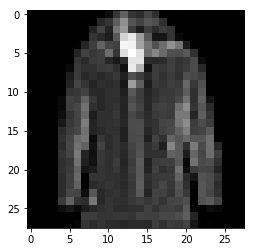

In [15]:
plot_fatten_img(train_images[19, :, :])

In [17]:
train_labels[19]

4

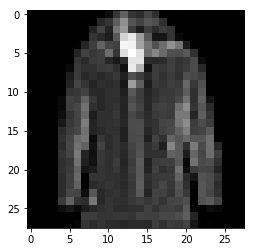

In [19]:
plot_fatten_img(train_images[19, :, :])

做一些資料的前處理

In [21]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((48000, 784),
 (12000, 784),
 (10000, 784),
 (48000, 10),
 (12000, 10),
 (10000, 10))

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

train_images.shape = (-1, 784)
X_test = test_images.reshape((-1, 784))

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit([[0, ], [1, ], [2, ], [3, ], [4, ], [5, ], [6, ], [7, ], [8, ], [9, ]])
train_labels = enc.transform(train_labels.reshape((-1, 1))).toarray()
y_test = enc.transform(test_labels.reshape((-1, 1))).toarray()

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.2)

In [22]:
y_train[6]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

### Mission

麻煩幫我使用 `(X_train, y_train)` 去訓練一個 Simple Logistic Classification，並且使用 `(X_valid, y_valid)` 去作validation，最後用 `(test_images, test_labels)` 來test出它的精確度。

In [0]:
import random
class SimpleLogisticClassification:

    def __init__(self, n_features, n_labels, learning_rate=0.5):
        self.n_features = n_features
        self.n_labels = n_labels

        self.weights = None
        self.biases = None

        self.graph = tf.Graph()  # initialize new graph
        self.build(learning_rate)  # building graph
        self.sess = tf.Session(graph=self.graph)  # create session by the graph

    def build(self, learning_rate):
        # Building Graph
        with self.graph.as_default():
            ### Input
            self.train_features = tf.placeholder(tf.float32, shape=(None, self.n_features))
            self.train_labels = tf.placeholder(tf.int32, shape=(None, self.n_labels))

            ### Optimalization
            # build neurel network structure and get their predictions and loss
            self.y_, self.loss = self.structure(features=self.train_features,
                                                labels=self.train_labels, train=True)
            # define training operation
            self.train_op = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)

            ### Prediction
            self.new_features = tf.placeholder(tf.float32, shape=(None, self.n_features))
            self.new_labels = tf.placeholder(tf.int32, shape=(None, self.n_labels))
            self.new_y_, self.new_loss = self.structure(features=self.new_features,
                                                        labels=self.new_labels)

            ### Initialization
            self.init_op = tf.global_variables_initializer()

    def structure(self, features, labels, train=False):
        n_hidden = 800
        # build neurel network structure and return their predictions and loss
        ### Variable
        if (not self.weights) or (not self.biases):
            self.weights = {
                'fc1': tf.Variable(tf.truncated_normal(shape=(self.n_features, 1000))),
                'fc2': tf.Variable(tf.truncated_normal(shape=(1000, 400))),
                'fc3': tf.Variable(tf.truncated_normal(shape=(400, self.n_labels))),
            }
            self.biases = {
                'fc1': tf.Variable(tf.zeros(shape=(1000))),
                'fc2': tf.Variable(tf.zeros(shape=(400))),
                'fc3': tf.Variable(tf.zeros(shape=(self.n_labels))),
            }

        ### Structure
        # one fully connected layer
        #logits = self.get_dense_layer(features, self.weights['fc1'], self.biases['fc1'])

        # layer 1
        dropout_ratio=0.1
        fc1 = self.get_dense_layer(features, self.weights['fc1'], self.biases['fc1'], activation = tf.nn.relu)
        fc2 = self.get_dense_layer(fc1, self.weights['fc2'], self.biases['fc2'], activation = tf.nn.relu)
        if train:
            fc2 = tf.nn.dropout(fc2, keep_prob=1-dropout_ratio)
        
        # layer 2
        logits = self.get_dense_layer(fc2, self.weights['fc3'], self.biases['fc3'])
        
        # predictions
        y_ = tf.nn.softmax(logits)

        # loss: softmax cross entropy
        loss = tf.reduce_mean(
                 tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

        return (y_, loss)

    def get_dense_layer(self, input_layer, weight, bias, activation=None):
        # fully connected layer
        x = tf.add(tf.matmul(input_layer, weight), bias)
        if activation:
            x = activation(x)
        return x
    
    def fit(self, X, y, epochs=10, validation_data=None, test_data=None):
        X = self._check_array(X)
        y = self._check_array(y)

        self.sess.run(self.init_op)
        for epoch in range(epochs):
            print('Epoch %2d/%2d: ' % (epoch+1, epochs))

            # fully gradient descent
            #feed_dict = {self.train_features: X, self.train_labels: y}
            #self.sess.run(self.train_op, feed_dict=feed_dict)

            # mini-batch gradient descent
            N = X.shape[0]
            index = [i for i in range(N)]
            random.shuffle(index)
            batch_size = 256
            while len(index) > 0:
                index_size = len(index)
                batch_index = [index.pop() for _ in range(min(batch_size, index_size))]

                feed_dict = {
                    self.train_features: X[batch_index, :],
                    self.train_labels: y[batch_index],
                }
                _, loss = self.sess.run([self.train_op, self.loss], feed_dict=feed_dict)

                print('[%d/%d] loss = %9.4f     ' % (N-len(index), N, loss), end='\r')

            
            # evaluate at the end of this epoch
            y_ = self.predict(X)
            train_loss = self.evaluate(X, y)
            train_acc = self.accuracy(y_, y)
            msg = ' loss = %8.4f, acc = %3.2f%%' % (train_loss, train_acc*100)

            if validation_data:
                val_loss = self.evaluate(validation_data[0], validation_data[1])
                val_acc = self.accuracy(self.predict(validation_data[0]), validation_data[1])
                msg += ', val_loss = %8.4f, val_acc = %3.2f%%' % (val_loss, val_acc*100)

            print(msg)

        if test_data:
            test_acc = self.accuracy(self.predict(test_data[0]), test_data[1])
            print('test_acc = %3.2f%%' % (test_acc*100))

    def accuracy(self, predictions, labels):
        return (np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))/predictions.shape[0])

    def predict(self, X):
        X = self._check_array(X)
        return self.sess.run(self.new_y_, feed_dict={self.new_features: X})

    def evaluate(self, X, y):
        X = self._check_array(X)
        y = self._check_array(y)
        return self.sess.run(self.new_loss, feed_dict={self.new_features: X, self.new_labels: y})

    def _check_array(self, ndarray):
        ndarray = np.array(ndarray)
        if len(ndarray.shape) == 1:
            ndarray = np.reshape(ndarray, (1, ndarray.shape[0]))
        return ndarray

In [66]:
model = SimpleLogisticClassification(n_features=28*28, n_labels=10, learning_rate= 0.005)
model.fit(
    X=X_train,
    y=y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    test_data=(X_test, y_test),
)

Epoch  1/50: 
 loss = 6541.0298, acc = 74.67%, val_loss = 7478.3042, val_acc = 74.40%
Epoch  2/50: 
 loss = 925.0847, acc = 59.48%, val_loss = 1463.6797, val_acc = 58.43%
Epoch  3/50: 
 loss = 293.5773, acc = 48.35%, val_loss = 618.6622, val_acc = 47.17%
Epoch  4/50: 
 loss = 132.6609, acc = 41.85%, val_loss = 420.8068, val_acc = 40.83%
Epoch  5/50: 
 loss =  64.0240, acc = 42.10%, val_loss = 293.1291, val_acc = 41.27%
Epoch  6/50: 
 loss =  37.5247, acc = 37.45%, val_loss = 256.2729, val_acc = 36.43%
Epoch  7/50: 
 loss =  22.8650, acc = 35.48%, val_loss = 209.2196, val_acc = 34.52%
Epoch  8/50: 
 loss =  15.1411, acc = 33.97%, val_loss = 182.6013, val_acc = 32.98%
Epoch  9/50: 
 loss =  10.6120, acc = 35.77%, val_loss = 175.3090, val_acc = 35.15%
Epoch 10/50: 
 loss =  10.6990, acc = 31.33%, val_loss = 165.7711, val_acc = 30.74%
Epoch 11/50: 
 loss =   7.9490, acc = 32.09%, val_loss = 145.2411, val_acc = 31.08%
Epoch 12/50: 
 loss =   9.8811, acc = 33.57%, val_loss = 138.7202, val_ac

KeyboardInterrupt: ignored

## Tensorflow補充資訊

loss
https://www.tensorflow.org/api_docs/python/tf/losses

optimizer
https://www.tensorflow.org/api_docs/python/tf/train
* search XXXOptimizer

dtype
https://www.tensorflow.org/api_docs/python/tf/dtypes/DType

math
https://www.tensorflow.org/api_docs/python/tf/math

nn
https://www.tensorflow.org/api_docs/python/tf/nn

layers
https://www.tensorflow.org/api_docs/python/tf/layers